In [202]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [203]:
def PGE_fix_fun(af, h):
    # fix requires am+(2*af)+((2+h)*af*am) > 0
    am = -(2*af)/(af*(h+2)+1)
    return am

In [204]:
def PGE_inv_fun(af, h):
    # invade requires af + 2*af + h*af*am > 0
    am = -(2*af)/((h*af)+1)
    return am

In [205]:
def X_fix_fun(af, h):
    # fix requires am+((2-(2*h))*af)+((2-h)*af*am) > 0
    am = -(2*(h-1)*af)/((af*(h-2))-1)
    return am

In [206]:
def X_inv_fun(af, h):
    # invade requires af + 2*h*af + h*af*am > 0
    am = -(2*h*af)/((h*af)+1)
    return am

/var/folders/f7/w9mgqp1n79s37vy6cvsfp35m0000gt/T/ipykernel_39483/3976928496.py:3: RuntimeWarning: invalid value encountered in scalar divide
  am = -(2*(h-1)*af)/((af*(h-2))-1)
/var/folders/f7/w9mgqp1n79s37vy6cvsfp35m0000gt/T/ipykernel_39483/1898298249.py:3: RuntimeWarning: divide by zero encountered in scalar divide
  am = -(2*af)/((h*af)+1)


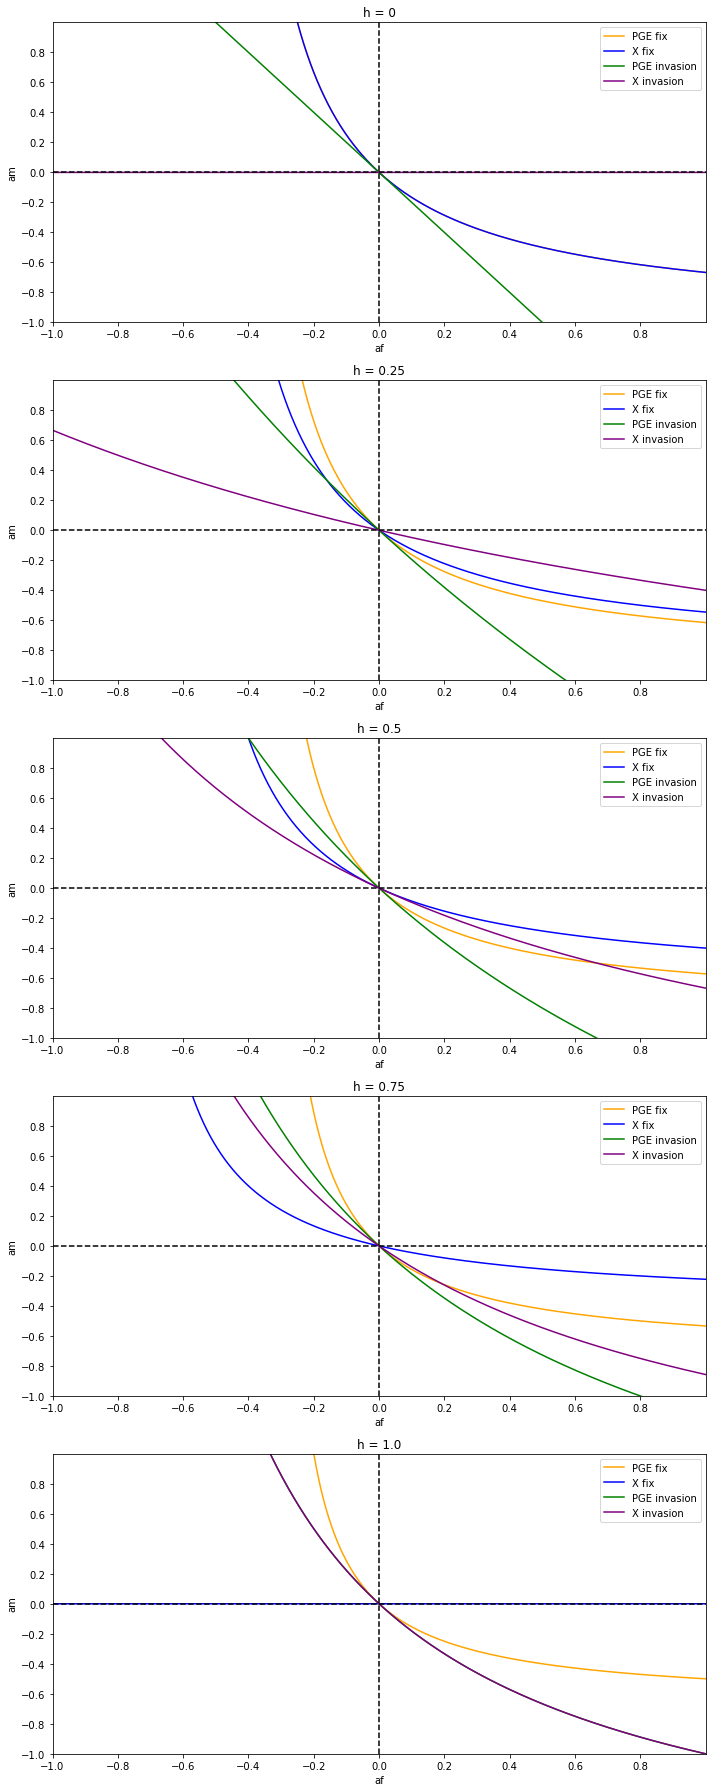

In [211]:
h_list = [0, 0.25, 0.5, 0.75, 1.0]

fig, axs = plt.subplots(nrows = len(h_list), sharex=False, figsize = (10,25))

af = np.arange(xmin, xmax, (xmax-xmin)/2e4)

xmin = ymin = -1
xmax = ymax = 1

for i, h in enumerate(h_list):
    
    am_PGE = [PGE_fix_fun(val, h) for val in af]
    af_PGE = af[am_PGE.index(max(am_PGE)):]
    am_PGE = am_PGE[am_PGE.index(max(am_PGE)):]
    
    am_X = [X_fix_fun(val, h) for val in af]
    af_X = af[am_X.index(max(am_X)):]
    am_X = am_X[am_X.index(max(am_X)):]
    
    am_inv_PGE = [PGE_inv_fun(val, h) for val in af]
    af_inv_PGE = af[am_inv_PGE.index(max(am_inv_PGE)):]
    am_inv_PGE = am_inv_PGE[am_inv_PGE.index(max(am_inv_PGE)):]
    
    am_inv_X = [X_inv_fun(val, h) for val in af]
    af_inv_X = af[am_inv_X.index(max(am_inv_X)):]
    am_inv_X = am_inv_X[am_inv_X.index(max(am_inv_X)):]
    
    sns.lineplot(x = af_PGE,
                 y = am_PGE,
                 color = 'orange',
                 label = 'PGE fix',
                 ax = axs[i])

    sns.lineplot(x = af_X,
                 y = am_X,
                 color = 'blue',
                 label = 'X fix',
                 ax = axs[i])
    
    sns.lineplot(x = af_inv_PGE,
             y = am_inv_PGE,
             color = 'green',
             label = 'PGE invasion',
             ax = axs[i])
    
    sns.lineplot(x = af_inv_X,
         y = am_inv_X,
         color = 'purple',
         label = 'X invasion',
         ax = axs[i])

    axs[i].axvline((xmax+xmin)/2, color='black',linestyle='--')
    axs[i].axhline((ymax+ymin)/2, color='black',linestyle='--')
    
    axs[i].set_xlim(xmin, xmax)
    axs[i].set_ylim(ymin, ymax)
    
    axs[i].set_xticks(np.arange(xmin, xmax, 0.2))
    axs[i].set_yticks(np.arange(ymin, ymax, 0.2))

    axs[i].set_ylabel('am')
    axs[i].set_xlabel('af')
    
    axs[i].set_title("h = "+str(h))
        
plt.legend()
plt.tight_layout()

plt.savefig('../figures/pge_X_fix.png', facecolor='white', transparent=False, dpi = 200)

In [191]:
am_PGE = [PGE_fix_fun(val, h) for val in af]
af_PGE = af[am_PGE.index(max(am_PGE)):]
am_PGE = am_PGE[am_PGE.index(max(am_PGE)):]